# Importing neccessary libraries #

In [1]:
#suppresses warning messages
import warnings
warnings.filterwarnings('ignore')

#API key to dataset
import kagglehub

In [2]:
import numpy as np
from numpy import asarray
import pandas as pd

In [3]:
#lightweight image processing tools
from PIL import Image

#mage processing, feature extraction, and real-time applications.
import cv2

# retrieve file paths that match a specified pattern
import glob

#Provides functions to interact with the operating system
import os

#Generates random numbers and performs random sampling
import random

#Allows running external system commands
import subprocess

In [4]:
import matplotlib.pyplot as plt

#Provides utilities for reading and writing images in various formats
from skimage.io import imread

#Used to draw rectangular shapes on plots
from matplotlib.patches import Rectangle

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input, Model, applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# Data collection from 5 different class #

In [6]:
#Creating 5 empty list of driver's behavior

image_list_other = []
image_list_safe = []
image_list_talking = []
image_list_text = []
image_list_turn = []

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#Loading other category images into image_list_other

for other in os.listdir("/content/drive/My Drive/driver_dataset/other_activities"):
    if other.endswith(".png") or other.endswith(".jpg"):
        image_list_other.append(os.path.join("/content/drive/My Drive/driver_dataset/other_activities",
                                             other))
        print(os.path.join("/content/drive/My Drive/driver_dataset/other_activities", other))



/content/drive/My Drive/driver_dataset/other_activities/img_2148.jpg
/content/drive/My Drive/driver_dataset/other_activities/img_21435.jpg
/content/drive/My Drive/driver_dataset/other_activities/img_21663.jpg
/content/drive/My Drive/driver_dataset/other_activities/img_21461.jpg
/content/drive/My Drive/driver_dataset/other_activities/img_21700.jpg
/content/drive/My Drive/driver_dataset/other_activities/img_21546.jpg
/content/drive/My Drive/driver_dataset/other_activities/img_2150.jpg
/content/drive/My Drive/driver_dataset/other_activities/img_21565.jpg
/content/drive/My Drive/driver_dataset/other_activities/img_21391.jpg
/content/drive/My Drive/driver_dataset/other_activities/img_21528.jpg
/content/drive/My Drive/driver_dataset/other_activities/img_21433.jpg
/content/drive/My Drive/driver_dataset/other_activities/img_21382.jpg
/content/drive/My Drive/driver_dataset/other_activities/img_21342.jpg
/content/drive/My Drive/driver_dataset/other_activities/img_21416.jpg
/content/drive/My Driv

In [9]:
#Loading text category images into image_list_text

for image in os.listdir("/content/drive/My Drive/driver_dataset/texting_phone"):
    if image.endswith(".png") or image.endswith(".jpg"):
        image_list_text.append(os.path.join("/content/drive/My Drive/driver_dataset/texting_phone",
                                             image))
        print(os.path.join("/content/drive/My Drive/driver_dataset/texting_phone", image))

/content/drive/My Drive/driver_dataset/texting_phone/img_33994.jpg
/content/drive/My Drive/driver_dataset/texting_phone/img_33917.jpg
/content/drive/My Drive/driver_dataset/texting_phone/img_33875.jpg
/content/drive/My Drive/driver_dataset/texting_phone/img_33648.jpg
/content/drive/My Drive/driver_dataset/texting_phone/img_33615.jpg
/content/drive/My Drive/driver_dataset/texting_phone/img_33949.jpg
/content/drive/My Drive/driver_dataset/texting_phone/img_33825.jpg
/content/drive/My Drive/driver_dataset/texting_phone/img_3351.jpg
/content/drive/My Drive/driver_dataset/texting_phone/img_33673.jpg
/content/drive/My Drive/driver_dataset/texting_phone/img_3358.jpg
/content/drive/My Drive/driver_dataset/texting_phone/img_33758.jpg
/content/drive/My Drive/driver_dataset/texting_phone/img_3384.jpg
/content/drive/My Drive/driver_dataset/texting_phone/img_33965.jpg
/content/drive/My Drive/driver_dataset/texting_phone/img_3357.jpg
/content/drive/My Drive/driver_dataset/texting_phone/img_33894.jpg

In [10]:
#Loading talk category images into image_list_talking

for image in os.listdir("/content/drive/My Drive/driver_dataset/talking_phone"):
    if image.endswith(".png") or image.endswith(".jpg"):
        image_list_talking.append(os.path.join("/content/drive/My Drive/driver_dataset/talking_phone",
                                             image))
        print(os.path.join("/content/drive/My Drive/driver_dataset/talking_phone", image))

/content/drive/My Drive/driver_dataset/talking_phone/img_32186.jpg
/content/drive/My Drive/driver_dataset/talking_phone/img_32336.jpg
/content/drive/My Drive/driver_dataset/talking_phone/img_32157.jpg
/content/drive/My Drive/driver_dataset/talking_phone/img_32444.jpg
/content/drive/My Drive/driver_dataset/talking_phone/img_32379.jpg
/content/drive/My Drive/driver_dataset/talking_phone/img_32644.jpg
/content/drive/My Drive/driver_dataset/talking_phone/img_32614.jpg
/content/drive/My Drive/driver_dataset/talking_phone/img_32465.jpg
/content/drive/My Drive/driver_dataset/talking_phone/img_32640.jpg
/content/drive/My Drive/driver_dataset/talking_phone/img_32491.jpg
/content/drive/My Drive/driver_dataset/talking_phone/img_32542.jpg
/content/drive/My Drive/driver_dataset/talking_phone/img_32533.jpg
/content/drive/My Drive/driver_dataset/talking_phone/img_32719.jpg
/content/drive/My Drive/driver_dataset/talking_phone/img_32554.jpg
/content/drive/My Drive/driver_dataset/talking_phone/img_32525

In [11]:
#Loading safe category images into image_list_safe

for image in os.listdir("/content/drive/My Drive/driver_dataset/safe_driving"):
    if image.endswith(".png") or image.endswith(".jpg"):
        image_list_safe.append(os.path.join("/content/drive/My Drive/driver_dataset/safe_driving",
                                             image))
        print(os.path.join("/content/drive/My Drive/driver_dataset/safe_driving", image))

/content/drive/My Drive/driver_dataset/safe_driving/img_52460.jpg
/content/drive/My Drive/driver_dataset/safe_driving/img_53145.jpg
/content/drive/My Drive/driver_dataset/safe_driving/img_52098.jpg
/content/drive/My Drive/driver_dataset/safe_driving/img_52396.jpg
/content/drive/My Drive/driver_dataset/safe_driving/img_52670.jpg
/content/drive/My Drive/driver_dataset/safe_driving/img_52801.jpg
/content/drive/My Drive/driver_dataset/safe_driving/img_52699.jpg
/content/drive/My Drive/driver_dataset/safe_driving/img_52282.jpg
/content/drive/My Drive/driver_dataset/safe_driving/img_5232.jpg
/content/drive/My Drive/driver_dataset/safe_driving/img_54086.jpg
/content/drive/My Drive/driver_dataset/safe_driving/img_53863.jpg
/content/drive/My Drive/driver_dataset/safe_driving/img_5401.jpg
/content/drive/My Drive/driver_dataset/safe_driving/img_5349.jpg
/content/drive/My Drive/driver_dataset/safe_driving/img_53945.jpg
/content/drive/My Drive/driver_dataset/safe_driving/img_53698.jpg
/content/driv

In [12]:
#Loading turn category images into image_list_turn

for image in os.listdir("/content/drive/My Drive/driver_dataset/turning"):
    if image.endswith(".png") or image.endswith(".jpg"):
        image_list_turn.append(os.path.join("/content/drive/My Drive/driver_dataset/turning",
                                             image))
        print(os.path.join("/content/drive/My Drive/driver_dataset/turning", image))

/content/drive/My Drive/driver_dataset/turning/img_54386.jpg
/content/drive/My Drive/driver_dataset/turning/img_54414.jpg
/content/drive/My Drive/driver_dataset/turning/img_54077.jpg
/content/drive/My Drive/driver_dataset/turning/img_55214.jpg
/content/drive/My Drive/driver_dataset/turning/img_54406.jpg
/content/drive/My Drive/driver_dataset/turning/img_54050.jpg
/content/drive/My Drive/driver_dataset/turning/img_55669.jpg
/content/drive/My Drive/driver_dataset/turning/img_54560.jpg
/content/drive/My Drive/driver_dataset/turning/img_55557.jpg
/content/drive/My Drive/driver_dataset/turning/img_54901.jpg
/content/drive/My Drive/driver_dataset/turning/img_54082.jpg
/content/drive/My Drive/driver_dataset/turning/img_54858.jpg
/content/drive/My Drive/driver_dataset/turning/img_55264.jpg
/content/drive/My Drive/driver_dataset/turning/img_54649.jpg
/content/drive/My Drive/driver_dataset/turning/img_55641.jpg
/content/drive/My Drive/driver_dataset/turning/img_54586.jpg
/content/drive/My Drive/

# Remove unreadable images #

In [13]:
def remove_unreadable_images(img_list):
    unreadable_files = []
    for filename in img_list:
        try:
            # Attempt to open the image
            with Image.open(filename) as img:
                img.verify()  # Verify if the file is valid
        except (IOError, SyntaxError):
            unreadable_files.append(filename)
            try:
                os.remove(filename)  # Attempt to remove the file
            except FileNotFoundError:
              pass
    return unreadable_files

In [14]:
unreadable_other_img = remove_unreadable_images(image_list_other)
unreadable_safe_img = remove_unreadable_images(image_list_safe)
unreadable_talk_img = remove_unreadable_images(image_list_talking)
unreadable_text_img = remove_unreadable_images(image_list_text)
unreadable_turn_img = remove_unreadable_images(image_list_turn)

# Plotting some random images from each class #

In [15]:
def plot_img(img_list, img_class):
    plt.figure(1, figsize=(15, 9))
    plt.axis('off')
    n = 0
    for i in range(4):
        n += 1
        random_img = random.choice(img_list)
        imgs = imread(random_img)

        # Fixed: Using separate arguments instead of 'fontdict'
        plt.suptitle(
            f"{img_class} Class",
            family='DejaVu Serif',  # Default font family
            color='#1f211f',
            fontsize=25,  # Set font size
            backgroundcolor='#fab72f'
        )

        plt.subplot(2, 2, n)  # Create a 2x2 grid for 4 images
        plt.imshow(imgs)
        plt.axis('off')  # Hide axes for better visualization

    plt.show()


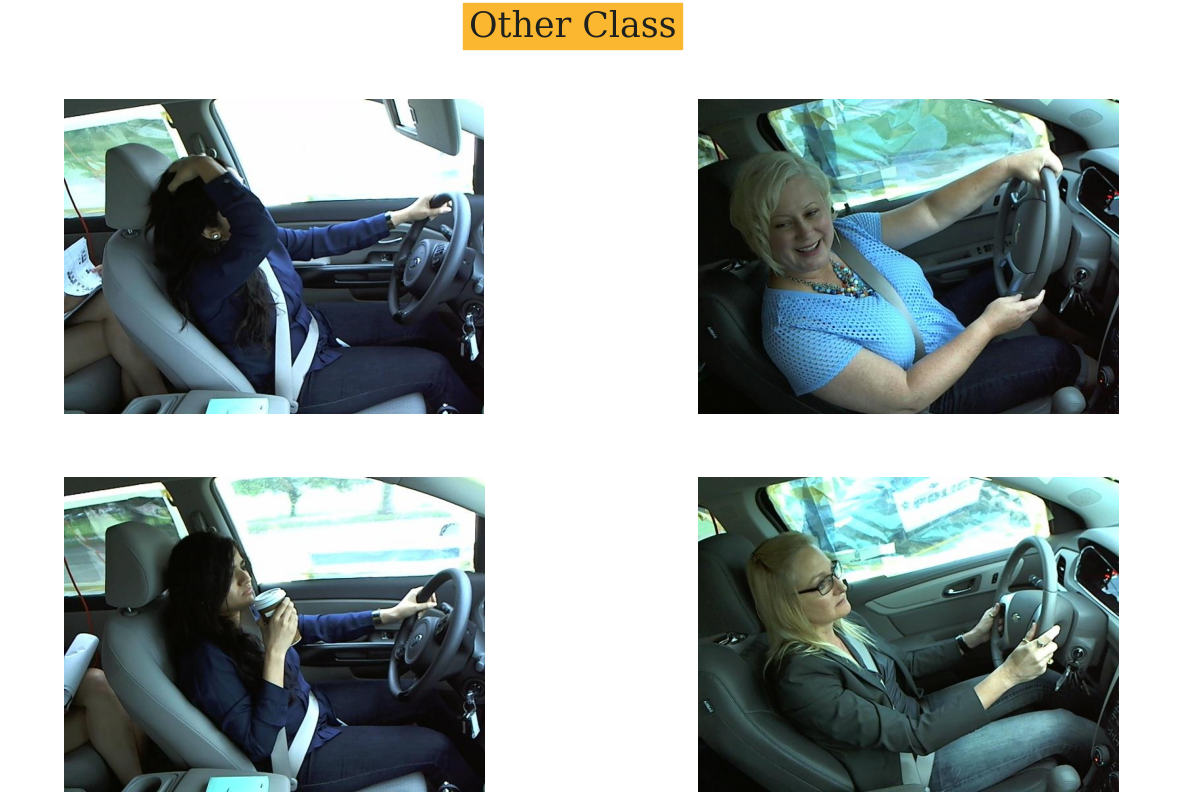

In [16]:
plot_img(image_list_other, "Other")

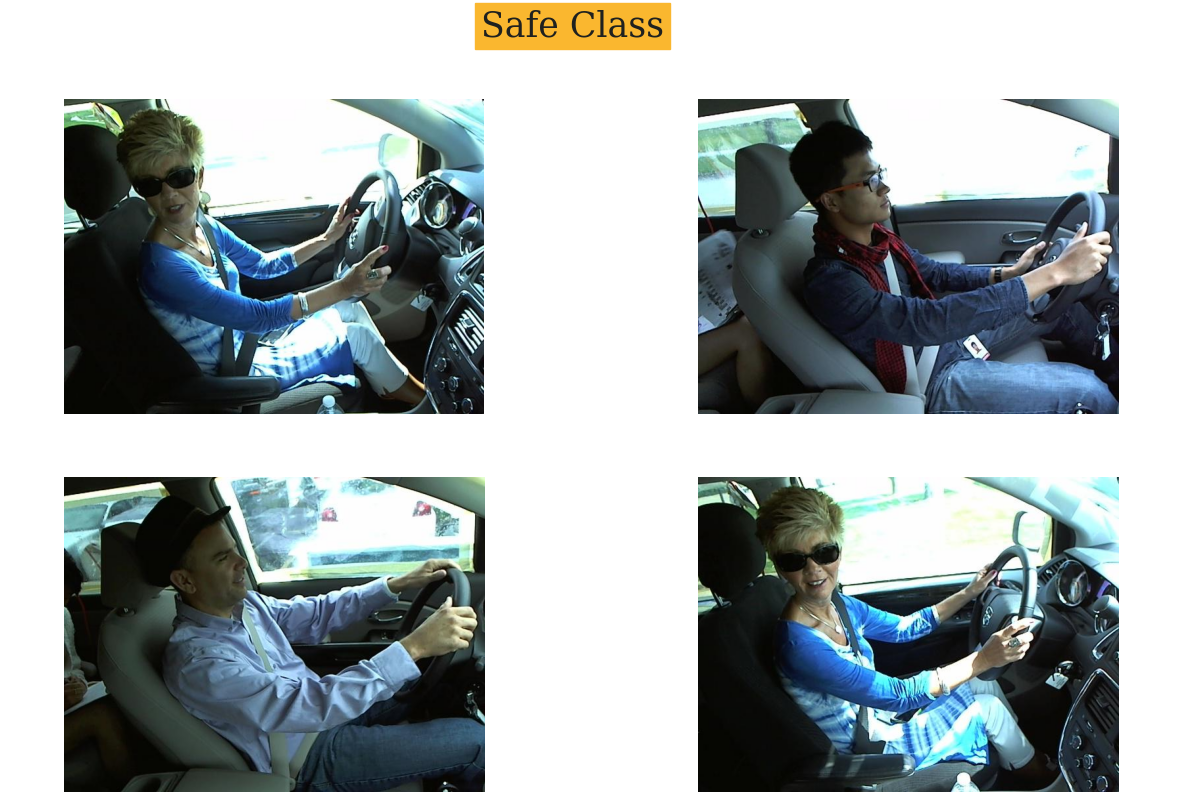

In [17]:
plot_img(image_list_safe, "Safe")

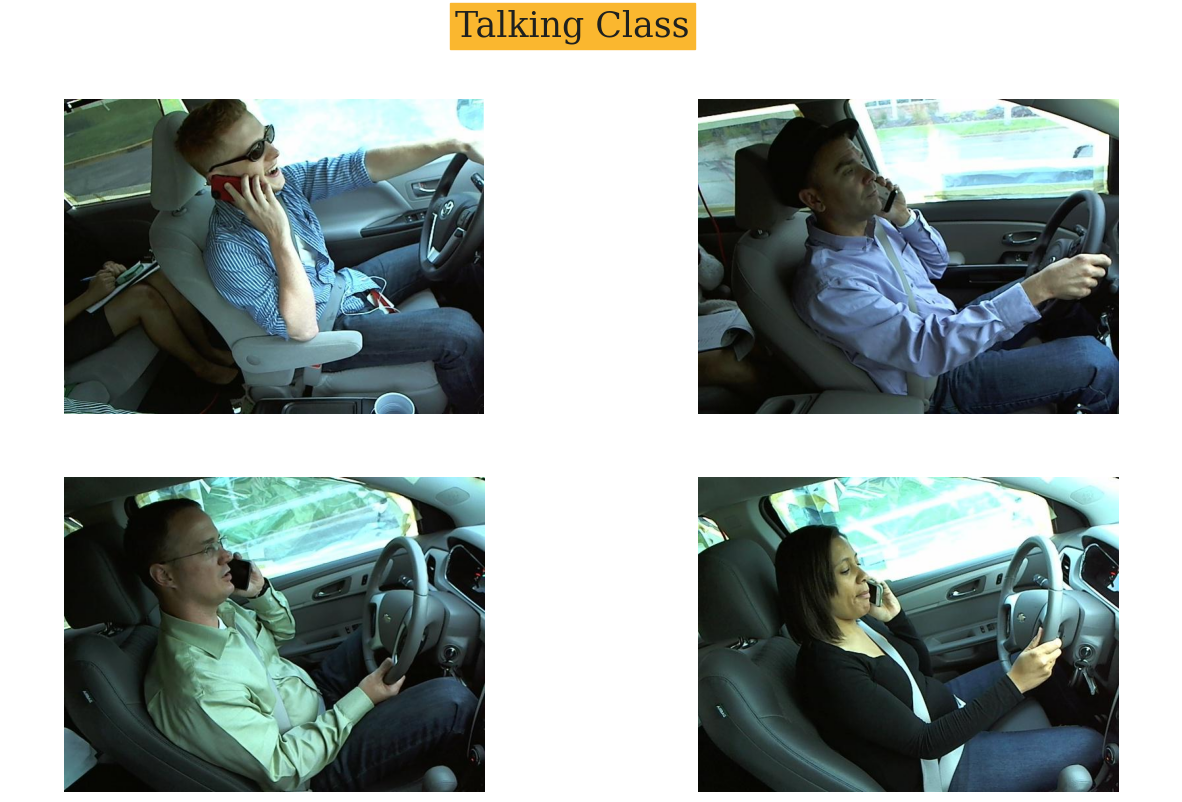

In [18]:
plot_img(image_list_talking, "Talking")

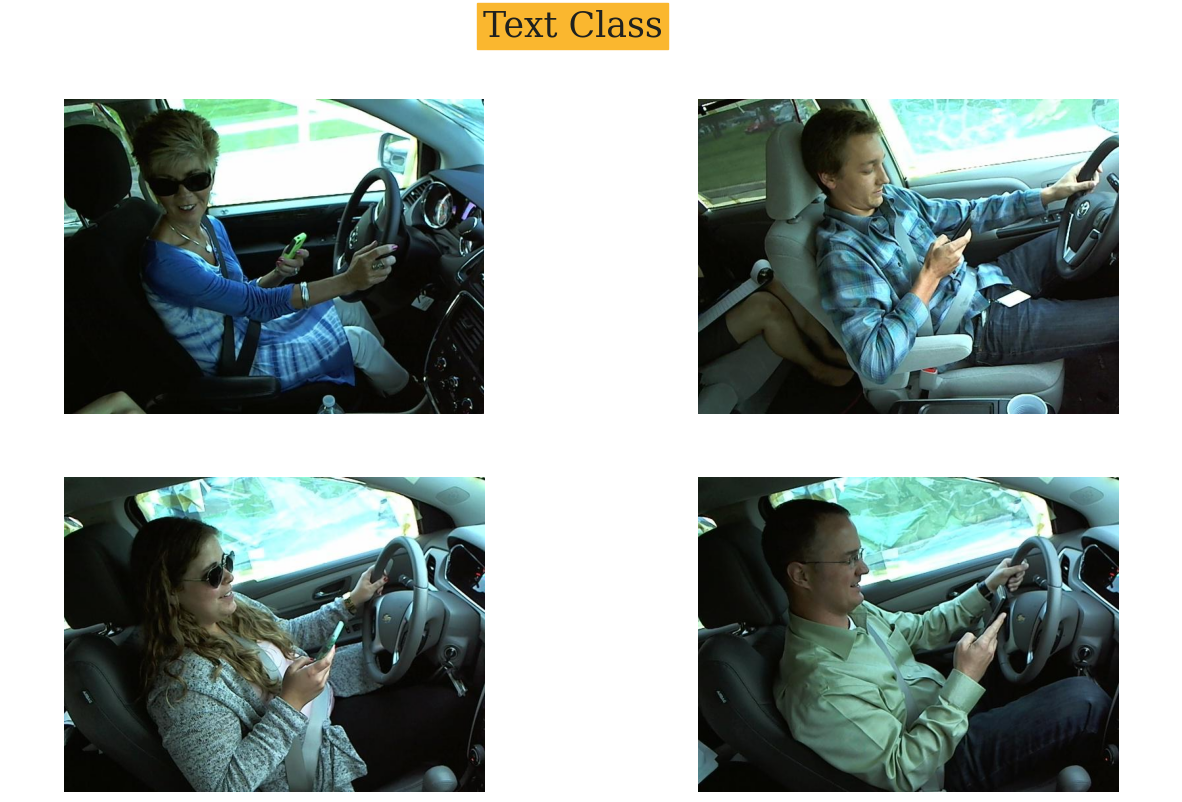

In [19]:
plot_img(image_list_text, "Text")

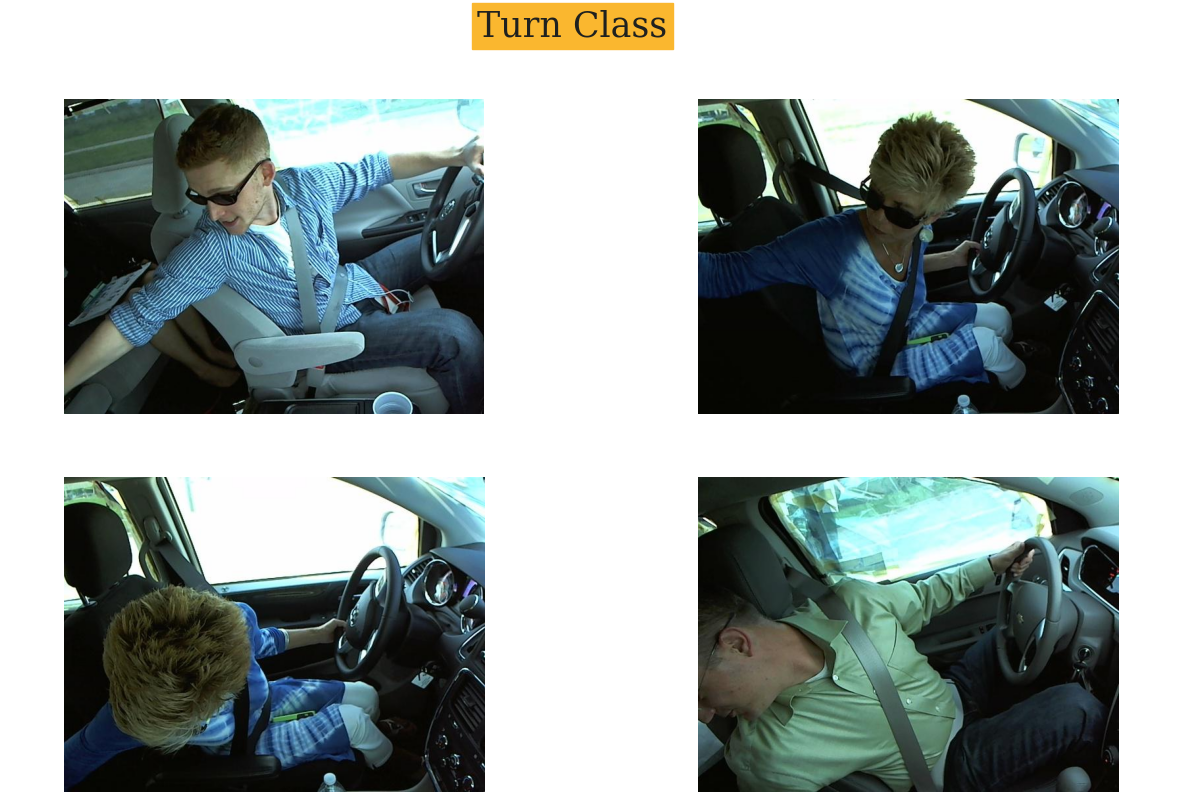

In [20]:
plot_img(image_list_turn, "Turn")

# Splitting Data into train, test and valid #

In [21]:
other_df = pd.DataFrame({'Image':image_list_other, 'Label': 'other'})
safe_df = pd.DataFrame({'Image':image_list_safe, 'Label': 'safe'})
text_df = pd.DataFrame({'Image':image_list_text, 'Label': 'text'})
talk_df = pd.DataFrame({'Image':image_list_talking, 'Label': 'talk'})
turn_df = pd.DataFrame({'Image':image_list_turn, 'Label': 'turn'})

In [22]:
from sklearn.model_selection import train_test_split

# Combine all dataframes into one
full_df = pd.concat([other_df, safe_df, text_df, talk_df, turn_df]).reset_index(drop=True)

# Split into training + validation and testing sets (85% train+val, 15% test)
train_val_df, test_df = train_test_split(full_df, test_size=0.15, stratify=full_df['Label'], random_state=42)

# Further split the training + validation set into training and validation (70% train, 15% val)
train_df, val_df = train_test_split(train_val_df, test_size=0.176, stratify=train_val_df['Label'], random_state=42)

# Print sizes of each split
print("Training data size:", len(train_df))
print("Validation data size:", len(val_df))
print("Testing data size:", len(test_df))

Training data size: 7529
Validation data size: 1609
Testing data size: 1613


# Image Preprocessing #

In [23]:
trainGenerator = ImageDataGenerator(rescale=1./255.)
valGenerator = ImageDataGenerator(rescale=1./255.)
testGenerator = ImageDataGenerator(rescale=1./255.)

In [24]:
trainDataset = trainGenerator.flow_from_dataframe(
  dataframe=train_df,
  class_mode="categorical",
  x_col="Image",
  y_col="Label",
  batch_size=64,
  seed=42,
  shuffle=True,
  target_size=(240,240) #set the height and width of the images
)

testDataset = testGenerator.flow_from_dataframe(
  dataframe=test_df,
  class_mode='categorical',
  x_col="Image",
  y_col="Label",
  batch_size=64,
  seed=42,
  shuffle=True,
  target_size=(240,240)
)

valDataset = valGenerator.flow_from_dataframe(
  dataframe=val_df,
  class_mode='categorical',
  x_col="Image",
  y_col="Label",
  batch_size=64,
  seed=42,
  shuffle=True,
  target_size=(240,240)
)

Found 7529 validated image filenames belonging to 5 classes.
Found 1613 validated image filenames belonging to 5 classes.
Found 1609 validated image filenames belonging to 5 classes.


# 1. AlexNet Model #

In [ ]:
from tensorflow.keras import layers, models, optimizers

def AlexNet():
    inp = layers.Input((240, 240, 3))
    x = layers.Conv2D(96, 11, 4, activation='relu')(inp)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(3, 2)(x)
    x = layers.Conv2D(256, 5, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(3, 2)(x)
    x = layers.Conv2D(384, 3, 1, activation='relu')(x)
    x = layers.Conv2D(384, 3, 1, activation='relu')(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.MaxPooling2D(3, 2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(5, activation='softmax')(x)

    model_Alex = models.Model(inputs=inp, outputs=x)

    return model_Alex


In [ ]:
model_alex = AlexNet()

model_alex.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),  # Adjust the learning rate as needed
    loss=BinaryCrossentropy(),  # Since it's a multi-class problem
    metrics=['accuracy']
)

In [ ]:
Alex_history = model_alex.fit(
    trainDataset,
    epochs=20,  # Adjust based on overfitting or underfitting
    validation_data=valDataset
)

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5959s 50s/step - accuracy: 0.3005 - loss: 0.9931 - val_accuracy: 0.3145 - val_loss: 0.5108
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 59s 503ms/step - accuracy: 0.6825 - loss: 0.2790 - val_accuracy: 0.7837 - val_loss: 0.2062
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 57s 484ms/step - accuracy: 0.8407 - loss: 0.1565 - val_accuracy: 0.8160 - val_loss: 0.1868
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 81s 474ms/step - accuracy: 0.9028 - loss: 0.1027 - val_accuracy: 0.8844 - val_loss: 0.1324
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 55s 467ms/step - accuracy: 0.9336 - loss: 0.0743 - val_accuracy: 0.8185 - val_loss: 0.1825
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 85s 494ms/step - accuracy: 0.9396 - loss: 0.0692 - val_accuracy: 0.9291 - val_loss: 0.0876
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 57s 484ms/step - accuracy: 0.9543 - loss: 0.0487 - val_accuracy: 0.9285 - val_loss: 0.0798
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 57s 484ms/step - accuracy: 0.9527 - loss: 0

In [ ]:
import pickle

# Save training history
with open('/content/drive/MyDrive/project/alexnet_history.pkl', 'wb') as f:
    pickle.dump(Alex_history.history, f)

In [ ]:
test_loss, test_acc = model_alex.evaluate(testDataset)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

26/26 ━━━━━━━━━━━━━━━━━━━━ 701s 27s/step - accuracy: 0.8240 - loss: 0.2220
Test Accuracy: 84.38%


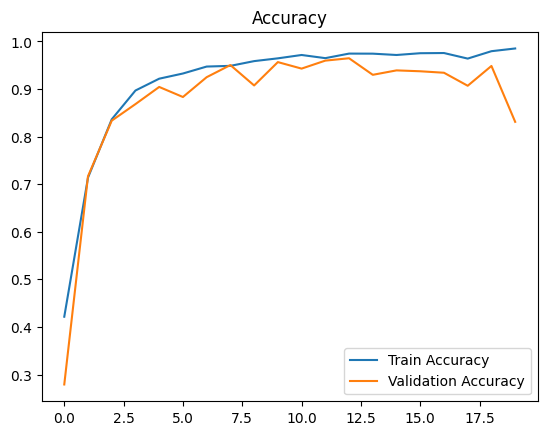

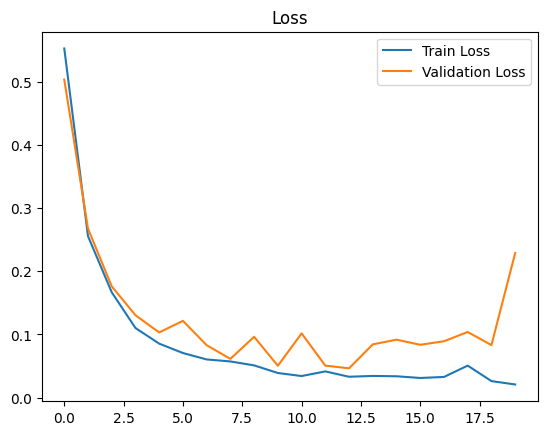

In [ ]:
plt.plot(Alex_history.history['accuracy'], label='Train Accuracy')
plt.plot(Alex_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# Plot loss
plt.plot(Alex_history.history['loss'], label='Train Loss')
plt.plot(Alex_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [ ]:
model.save('Alex_model.keras')

In [ ]:
!cp Alex_model.keras /content/drive/MyDrive/project/AlexNet

# ResNet #

In [ ]:
# Load ResNet-34 model without top layers (pretrained on ImageNet)
base_model = applications.ResNet50(  # Using ResNet50 as ResNet34 is unavailable in Keras
    weights="imagenet",
    include_top=False,
    input_shape=(240, 240, 3)
)

# Freeze base model layers (optional, for transfer learning)
base_model.trainable = False


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Define the model
model_res = models.Sequential([
    base_model,  # Pretrained ResNet base
    layers.GlobalAveragePooling2D(),  # Reduces dimensions efficiently
    layers.Dense(512, activation='relu'),  # Fully connected layer
    layers.Dropout(0.5),  # Prevent overfitting
    layers.Dense(5, activation='softmax')  # Output layer
])

In [ ]:
# Compile the model
model_res.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model_res.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 8, 8, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,639,365 (93.99 MB)

 Trainable params: 1,051,653 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Train the model
Res_model = model_res.fit(
    trainDataset,
    validation_data=valDataset,
    epochs=20,  # Adjust based on performance
)

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3670s 31s/step - accuracy: 0.2113 - loss: 1.7357 - val_accuracy: 0.2977 - val_loss: 1.5853
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 71s 598ms/step - accuracy: 0.2574 - loss: 1.5853 - val_accuracy: 0.3064 - val_loss: 1.5706
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 71s 601ms/step - accuracy: 0.2836 - loss: 1.5672 - val_accuracy: 0.2989 - val_loss: 1.5570
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 62s 522ms/step - accuracy: 0.3092 - loss: 1.5383 - val_accuracy: 0.3325 - val_loss: 1.5128
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 60s 506ms/step - accuracy: 0.3261 - loss: 1.5095 - val_accuracy: 0.3791 - val_loss: 1.4766
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 59s 499ms/step - accuracy: 0.3492 - loss: 1.4796 - val_accuracy: 0.4040 - val_loss: 1.4363
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 58s 493ms/step - accuracy: 0.3656 - loss: 1.4498 - val_accuracy: 0.4121 - val_loss: 1.4192
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 58s 494ms/step - accuracy: 0.3781 - loss: 1

In [ ]:
import pickle

# Save training history
with open('/content/drive/MyDrive/project/ResNet_history.pkl', 'wb') as f:
    pickle.dump(Res_model.history, f)

In [ ]:
test_loss, test_acc = model_res.evaluate(testDataset)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

26/26 ━━━━━━━━━━━━━━━━━━━━ 15s 557ms/step - accuracy: 0.5585 - loss: 1.1093
Test Accuracy: 57.35%


In [ ]:
#  model_res.save('ResNet34.keras')

In [ ]:
#  !cp ResNet34.keras /content/drive/MyDrive/project/ResNet34

# VGGNet #

In [25]:
from tensorflow.keras.applications import VGG16

# Load Pretrained VGG16 without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(240, 240, 3))

# Freeze the convolutional base
base_model.trainable = False

# Build the Model
model_vgg = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')  # Adjust based on your classes
])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [26]:
# Compile the model
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
# Train the model
VGG_model = model_vgg.fit(trainDataset, epochs=20, validation_data=valDataset)

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2231s 19s/step - accuracy: 0.4606 - loss: 4.1406 - val_accuracy: 0.9354 - val_loss: 0.3601
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 61s 514ms/step - accuracy: 0.8813 - loss: 0.3977 - val_accuracy: 0.9466 - val_loss: 0.1799
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 82s 517ms/step - accuracy: 0.9400 - loss: 0.2101 - val_accuracy: 0.9745 - val_loss: 0.1148
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 60s 511ms/step - accuracy: 0.9500 - loss: 0.1574 - val_accuracy: 0.9758 - val_loss: 0.0776
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 60s 509ms/step - accuracy: 0.9610 - loss: 0.1296 - val_accuracy: 0.9776 - val_loss: 0.0719
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 60s 506ms/step - accuracy: 0.9654 - loss: 0.1049 - val_accuracy: 0.9826 - val_loss: 0.0602
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 61s 513ms/step - accuracy: 0.9758 - loss: 0.0747 - val_accuracy: 0.9832 - val_loss: 0.0490
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 60s 506ms/step - accuracy: 0.9758 - loss: 0

In [28]:
import pickle

# Save training history
with open('/content/drive/MyDrive/project/VGG_model.pkl', 'wb') as f:
    pickle.dump(VGG_model.history, f)

In [ ]:
test_loss, test_acc = model_vgg.evaluate(testDataset)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

26/26 ━━━━━━━━━━━━━━━━━━━━ 565s 22s/step - accuracy: 0.9871 - loss: 0.0535
Test Accuracy: 98.64%


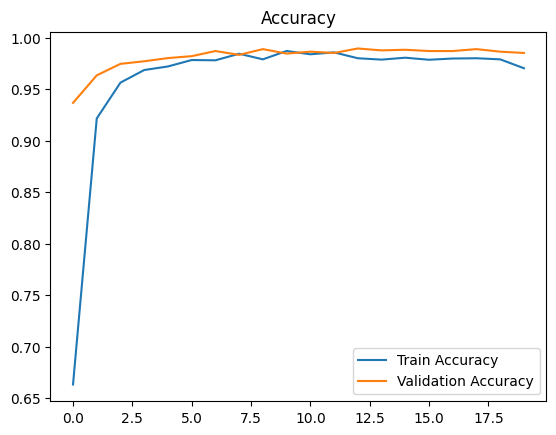

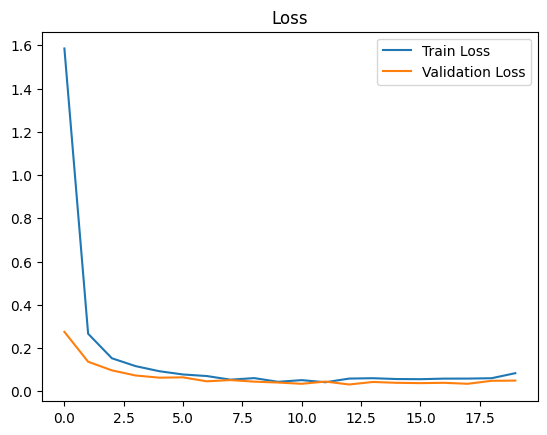

In [ ]:
plt.plot(VGG_model.history['accuracy'], label='Train Accuracy')
plt.plot(VGG_model.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# Plot loss
plt.plot(VGG_model.history['loss'], label='Train Loss')
plt.plot(VGG_model.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [ ]:
# model.save('VGGNet.keras')

In [ ]:
# !cp VGGNet.keras /content/drive/MyDrive/project/VGGNet

# Load saved model from drive #

In [29]:
from tensorflow.keras.models import load_model

# Load models (Change the path based on your saved location)
alexnet_model = load_model('/content/drive/MyDrive/project/AlexNet/my_model.keras')
resnet_model = load_model('/content/drive/MyDrive/project/ResNet34/ResNet34.keras')
vgg_model = load_model('/content/drive/MyDrive/project/VGGNet/VGGNet.keras')

print("Models Loaded Successfully!")


Models Loaded Successfully!


In [30]:
# Load history
with open('/content/drive/MyDrive/project/alexnet_history.pkl', 'rb') as f:
    history_alex = pickle.load(f)

with open('/content/drive/MyDrive/project/ResNet_history.pkl', 'rb') as f:
    history_res = pickle.load(f)

with open('/content/drive/MyDrive/project/VGG_model.pkl', 'rb') as f:
    history_vgg = pickle.load(f)


In [34]:
# Extract Accuracy and Loss from history dictionaries
alex_train_acc = history_alex['accuracy']
alex_val_acc = history_alex['val_accuracy']
alex_train_loss = history_alex['loss']
alex_val_loss = history_alex['val_loss']

res_train_acc = history_res['accuracy']
res_val_acc = history_res['val_accuracy']
res_train_loss = history_res['loss']
res_val_loss = history_res['val_loss']

vgg_train_acc = history_vgg['accuracy']
vgg_val_acc = history_vgg['val_accuracy']
vgg_train_loss = history_vgg['loss']
vgg_val_loss = history_vgg['val_loss']


# Compare accuracy and error of all three models #

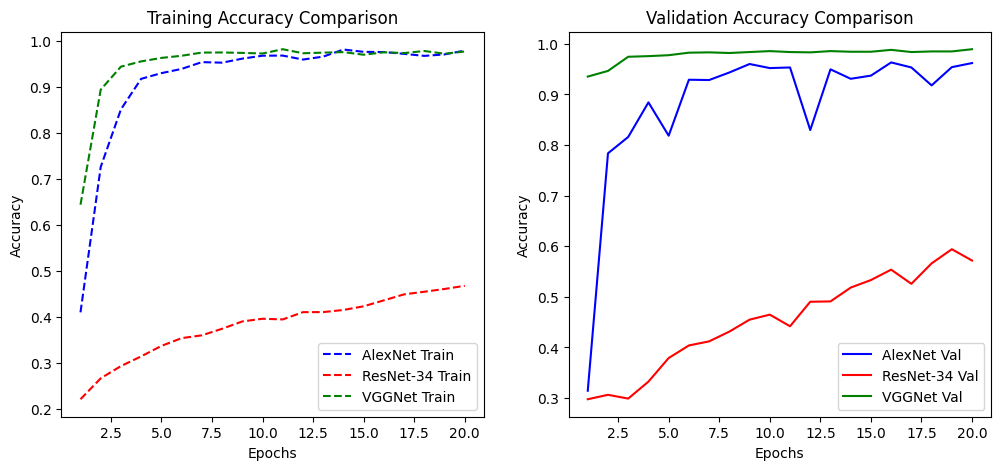

In [35]:
import matplotlib.pyplot as plt

epochs = range(1, len(alex_train_acc) + 1)  # Number of epochs

plt.figure(figsize=(12, 5))

# Training Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, alex_train_acc, label='AlexNet Train', linestyle='dashed', color='blue')
plt.plot(epochs, res_train_acc, label='ResNet-34 Train', linestyle='dashed', color='red')
plt.plot(epochs, vgg_train_acc, label='VGGNet Train', linestyle='dashed', color='green')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy Comparison")
plt.legend()

# Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, alex_val_acc, label='AlexNet Val', color='blue')
plt.plot(epochs, res_val_acc, label='ResNet-34 Val', color='red')
plt.plot(epochs, vgg_val_acc, label='VGGNet Val', color='green')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy Comparison")
plt.legend()

plt.show()


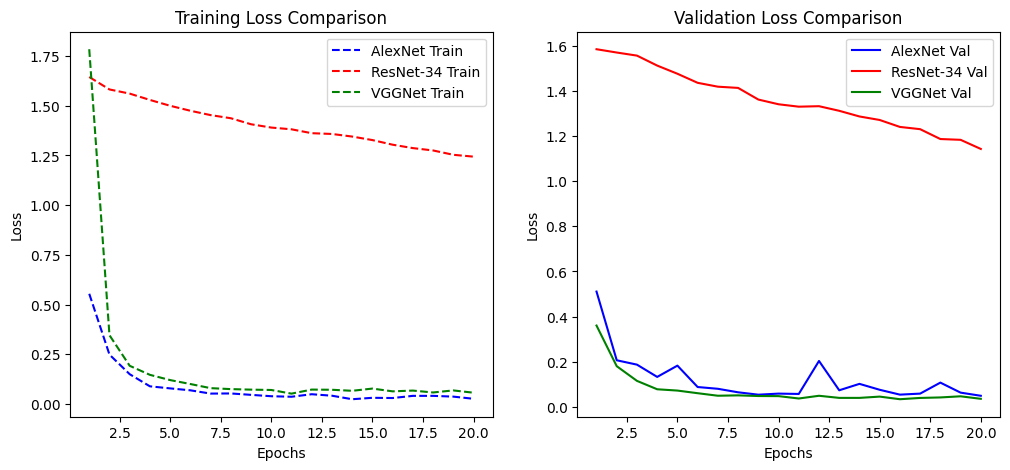

In [37]:
plt.figure(figsize=(12, 5))

# Training Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, alex_train_loss, label='AlexNet Train', linestyle='dashed', color='blue')
plt.plot(epochs, res_train_loss, label='ResNet-34 Train', linestyle='dashed', color='red')
plt.plot(epochs, vgg_train_loss, label='VGGNet Train', linestyle='dashed', color='green')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Comparison")
plt.legend()

# Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, alex_val_loss, label='AlexNet Val', color='blue')
plt.plot(epochs, res_val_loss, label='ResNet-34 Val', color='red')
plt.plot(epochs, vgg_val_loss, label='VGGNet Val', color='green')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Validation Loss Comparison")
plt.legend()

plt.show()


In [38]:
print(f"AlexNet Final Accuracy: Train = {alex_train_acc[-1]:.4f}, Val = {alex_val_acc[-1]:.4f}")
print(f"ResNet-34 Final Accuracy: Train = {res_train_acc[-1]:.4f}, Val = {res_val_acc[-1]:.4f}")
print(f"VGGNet Final Accuracy: Train = {vgg_train_acc[-1]:.4f}, Val = {vgg_val_acc[-1]:.4f}")

print(f"\nAlexNet Final Loss: Train = {alex_train_loss[-1]:.4f}, Val = {alex_val_loss[-1]:.4f}")
print(f"ResNet-34 Final Loss: Train = {res_train_loss[-1]:.4f}, Val = {res_val_loss[-1]:.4f}")
print(f"VGGNet Final Loss: Train = {vgg_train_loss[-1]:.4f}, Val = {vgg_val_loss[-1]:.4f}")


AlexNet Final Accuracy: Train = 0.9791, Val = 0.9621
ResNet-34 Final Accuracy: Train = 0.4682, Val = 0.5718
VGGNet Final Accuracy: Train = 0.9772, Val = 0.9894

AlexNet Final Loss: Train = 0.0262, Val = 0.0488
ResNet-34 Final Loss: Train = 1.2437, Val = 1.1431
VGGNet Final Loss: Train = 0.0567, Val = 0.0353
